In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = url + "&appid=" + weather_api_key + "&units=" + unit + "&q=" 

city_name = []
latitude = []
longtitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country_name = []
dates = []

Count = 0
SetCount = 1

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        latitude.append(response["coord"]["lat"])
        longtitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_name.append(response["sys"]["country"])
        dates.append(response["dt"])
        
        if Count < 49:
            Count += 1
            city_name.append(city)
        else:
            Count = 1
            SetCount += 1
            city_name.append(city)
        print(f"Processing Record {Count} of Set {SetCount} | {city}")
    
    
    except:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | dubai
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | chern
Processing Record 6 of Set 1 | alexandroupoli
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | praia
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | ambilobe
Processing Record 18 of Set 1 | paamiut
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | hilo
City not found. Skipping...
Processing Record 22 of S

City not found. Skipping...
Processing Record 43 of Set 4 | natal
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | karatau
City not found. Skipping...
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | bagrami
Processing Record 48 of Set 4 | soyo
City not found. Skipping...
Processing Record 49 of Set 4 | carutapera
Processing Record 1 of Set 5 | urumqi
Processing Record 2 of Set 5 | aguimes
Processing Record 3 of Set 5 | vologda
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | springbok
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | marabba
Processing Record 8 of Set 5 | sugar hill
Processing Record 9 of Set 5 | teguldet
Processing Record 10 of Set 5 | nome
Processing Record 11 of Set 5 | wichita falls
Processing Record 12 of Set 5 | clarence town
Processing Record 13 of Set 5 | tarko-sale
Processing Record 14 of Set 5 | faanui
Processing Record 15 of Set 5 | kavaratti
City not found. Skipping...
C

City not found. Skipping...
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | aksha
Processing Record 36 of Set 8 | santa maria da vitoria
Processing Record 37 of Set 8 | abalak
Processing Record 38 of Set 8 | oktyabrskiy
City not found. Skipping...
Processing Record 39 of Set 8 | miraflores
City not found. Skipping...
Processing Record 40 of Set 8 | junin
Processing Record 41 of Set 8 | changji
Processing Record 42 of Set 8 | saint anthony
Processing Record 43 of Set 8 | sarangani
Processing Record 44 of Set 8 | ler
Processing Record 45 of Set 8 | pijijiapan
Processing Record 46 of Set 8 | tiarei
Processing Record 47 of Set 8 | dondo
Processing Record 48 of Set 8 | yarega
Processing Record 49 of Set 8 | ekibastuz
Processing Record 1 of Set 9 | sao jose da coroa grande
Processing Record 2 of Set 9 | lazaro cardenas
Processing Record 3 of Set 9 | carinhanha
Processing Record 4 of Set 9 | sven
Processing Record 5 of Set 9 | msanga
Processing Record 6 of Set 9 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherpy_dict = {"City" : city_name, "Lat" : latitude, "Lng" : longtitude, "Max Temp" : max_temperature, "Humidity" : humidity, "Cloudiness" : cloudiness, "Wind Speed" : wind_speed, "Country" : country_name, "Date" : dates }

weatherpy_df = pd.DataFrame(weatherpy_dict)

In [5]:
#Export the city data into a .csv.
weatherpy_df.to_csv(output_data_file)

In [6]:
#Display the DataFrame
weatherpy_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dubai,25.2582,55.3047,95.29,12,0,4.61,AE,1648189073
1,puerto ayora,-0.7393,-90.3518,77.86,82,85,6.22,EC,1648189257
2,saint-philippe,-21.3585,55.7679,85.59,75,17,8.01,RE,1648189258
3,tuktoyaktuk,69.4541,-133.0374,-14.82,94,5,11.59,CA,1648189258
4,chern,53.4523,36.9145,33.04,96,100,3.74,RU,1648189259
...,...,...,...,...,...,...,...,...,...
545,haines junction,60.7522,-137.5108,30.15,69,100,1.14,CA,1648189690
546,toamasina,-18.1667,49.3833,86.00,74,40,3.44,MG,1648189691
547,valparaiso,-33.0393,-71.6273,61.48,60,0,4.61,CL,1648189630
548,sobolevo,54.4299,31.8996,30.56,100,90,3.44,RU,1648189692


In [7]:
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,22.149341,19.669103,55.105873,72.065455,57.387273,8.356527,1.648189e+09
std,33.439027,89.195218,24.427507,21.462453,39.789760,6.038494,1.464426e+02
min,-54.800000,-175.200000,-14.820000,1.000000,0.000000,0.000000,1.648189e+09
25%,-5.228675,-57.433050,35.655000,62.000000,17.000000,3.932500,1.648189e+09
50%,28.865800,27.068150,57.765000,76.000000,71.000000,6.710000,1.648189e+09
75%,50.694425,96.123875,75.505000,88.000000,99.000000,11.410000,1.648190e+09
max,78.218600,178.416700,98.370000,100.000000,100.000000,34.020000,1.648190e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Get the indices of cities that have humidity over 100%.
# Max in describe = 100.00 therefore no humidities > 100%

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

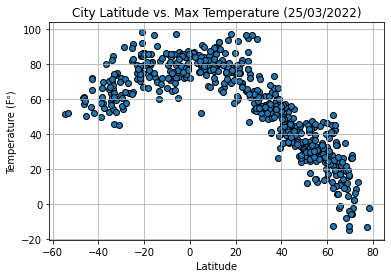

In [10]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Max Temp"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fᵒ)")
plt.title("City Latitude vs. Max Temperature (25/03/2022)")
plt.grid()
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

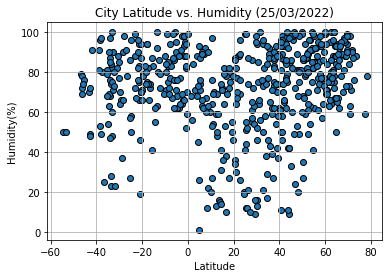

In [11]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Humidity"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (25/03/2022)")
plt.grid()
plt.savefig("output_data/Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

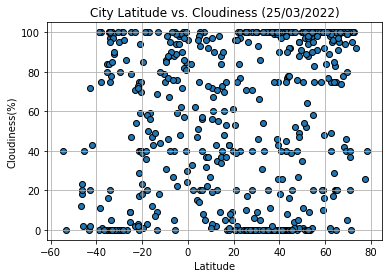

In [12]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Cloudiness"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (25/03/2022)")
plt.grid()
plt.savefig("output_data/Lat_vs_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

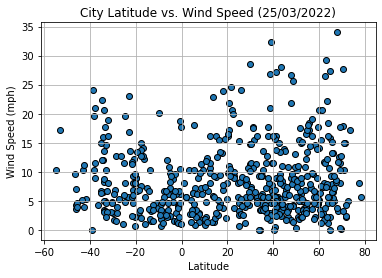

In [13]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Wind Speed"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (25/03/2022)")
plt.grid()
plt.savefig("output_data/Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [14]:
northern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"] >= 0)]
southern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

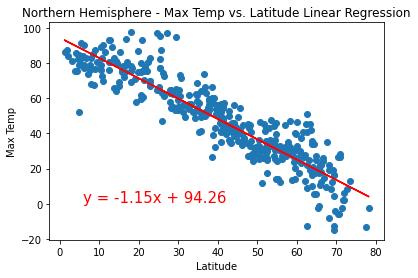

In [77]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/North_Temp_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

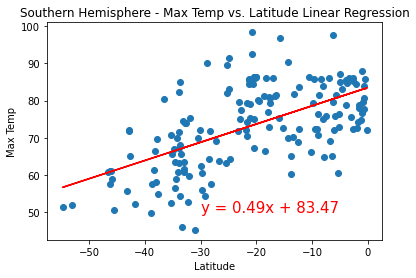

In [78]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/South_Temp_Lat_LinReg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

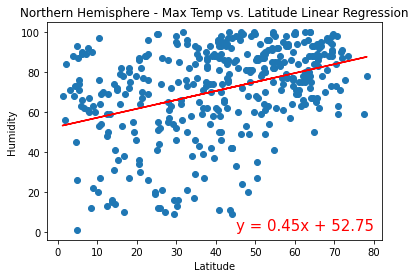

In [79]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/North_Hum_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

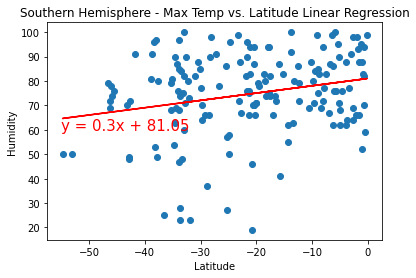

In [80]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("output_data/South_Hum_Lat_LinReg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

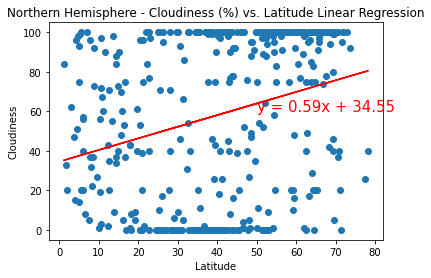

In [81]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("output_data/North_Cloud_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

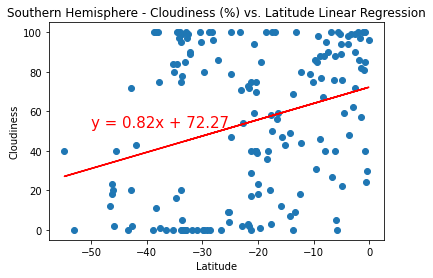

In [82]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 52),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("output_data/South_Cloud_Lat_LinReg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

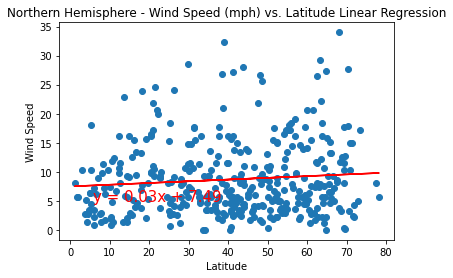

In [83]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/North_Wind_Lat_LinReg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

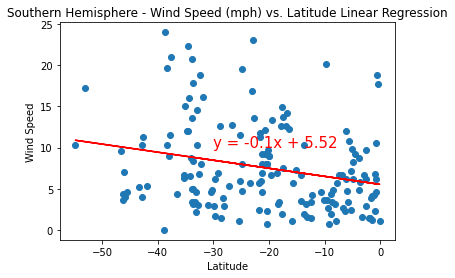

In [84]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/South_Wind_Lat_LinReg.png")
plt.show()